<font size = 4>注：本文档中的代码和实例是在学习了《机器学习实战》第五章后总结的。</font>

## logistic regression 

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit   #expit(x) = 1.0 / (1 + exp(-x))

### 导入数据

In [104]:
#加载数据集
def loadtext():
    data = []
    label = [] #定义两个空列表用于存储变量数据和标签数据
    f = open("logistic regression testSet.txt")
    for line in f.readlines():
        linearr = line.strip().split()#首先去掉空格，然后分隔字符
        data.append([1.0,float(linearr[0]),float(linearr[1])])#注意：需要将字符串类型换为数值型
        label.append(int(linearr[2]))
    return data,label
        
    

### 定义迭代公式（批处理梯度上升）

In [108]:
def gradascent(variables,classlabels):
    datamat = np.mat(variables)
    labelmat = np.mat(classlabels).T #将输入的x变量和y变量转换为矩阵
    m,n = np.shape(datamat)#得到矩阵的行数和列数
    theta = np.ones((n,1))#定义初始theta值
    alpha = 0.001
    maxcycles = 500
    for i in range(maxcycles):
        h = expit(datamat * theta)
        #print(h)
        error = labelmat - h 
        theta = theta + alpha * datamat.T * error #迭代更新公式
    return theta
        
        


### 计算结果

In [112]:
data,label = loadtext()
theta = gradascent(data,label)
theta

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 画出决策边界（分界线）

In [135]:
def plotline(theta):
    dataarr = np.array(data)#转换为mumpy的array类型
    n = np.shape(dataarr)[0]
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    for i in range(n):
        if label[i] == 1:
            x0.append(data[i][1])
            y0.append(data[i][2]) #将标签值为1的数据存为1组值
        else:
            x1.append(data[i][1])
            y1.append(data[i][2]) #将标签值为0的数据存为另一组值
    #开始绘图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x0,y0,s = 30,c = "red")
    ax.scatter(x1,y1,s = 30,c = "green") #绘制散点图
    x = np.arange(-3.0,3.0,0.1)
    #print(x)
    theta = np.array(theta)#重要！！！必须将theta 转换为array类型才能进行运算
    y = (-(theta[0])-theta[1] * x) / theta[2]
    ax.plot(x,y)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
    

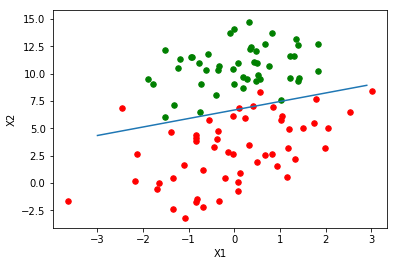

In [136]:
plotline(theta)

### 随机梯度上升

In [156]:
def stocgradascent(variables,classlabels):
    datamat = np.mat(variables)
    labelmat = np.mat(classlabels).T #将输入的x变量和y变量转换为矩阵
    m,n = np.shape(datamat)#得到矩阵的行数和列数
    theta = np.ones((n,1))#定义初始theta值
    alpha = 0.01
    #maxcycles = 500
    for i in range(m):#迭代次数为训练集的个数，重要！！
        h = expit(datamat[i] * theta)#计算每一个训练样本的h值
        error = labelmat[i] - h 
        theta = theta + alpha * datamat[i].T * error #迭代更新公式
    return theta
        

In [157]:
data,label = loadtext()# 继续使用testSet.txt的数据
stoc_theta = stocgradascent(data,label)
stoc_theta

matrix([[ 1.01702007],
        [ 0.85914348],
        [-0.36579921]])

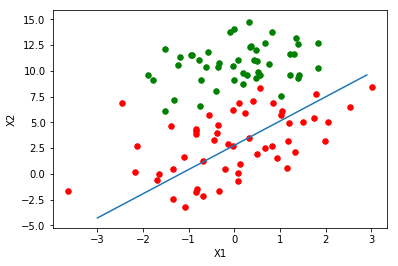

In [158]:
plotline(stoc_theta)

## 实例：从疝气病症预测病马的死亡率

- 数据来源：http://archive.ics.uci.edu/ml/datasets/Horse+Colic
- 有两个文件，分别为训练集horseColicTraining.txt和测试集horseColicTest.txt
- 数据集中有21个特征，1个label（0 or 1)


In [159]:
def classifyfunc(x): #定义一个分类函数
    prob = expit(x) #计算logistic函数
    if prob > 0.5:
        return 1.0
    else:
        return 0  

In [165]:
def colictest(): #定义一个分类器
    ftrain = open("horseColicTraining.txt")         #打开训练集
    ftest = open("horseColicTest.txt")              #打开测试集
    for line in ftrain.readlines():
        currline = line.strip().split()
        trainning_set = []                          #存放特征值的list
        trainning_label= []                         #存放label的list
        for i in range(21):                         #因为有21个特征
            trainning_set.append(float(currline[i]))
        trainning_label.append(float(currline[21]))#前21个为特征向量，最后一列为label值
    trainning_theta = stocgradascent(trainning_set,trainning_label)
    #计算分类准确度
    error_count = 0
    num_test = 0
    for line in ftest.readlines():
        num_test+=1
        currline = line.strip().split()
        linearr = []
        for i in range(21):                         #因为有21个特征
            linearr.append(float(currline[i]))
        h = np.mat(linearr) * trainning_theta       #将特征值和对应的theta值相乘后相加
        if classifyfunc(h) != int(currline[21]):    #预测值和真实值的比较
            error_count += 1
    error_rate = error_count / num_test             #计算分类准确度
    print("the error_rate is %f" %error_rate)
    return error_rate
    
colictest()    

the error_rate is 0.298507


0.29850746268656714